# Vector and Matrix Multiplication

#### calculate the total price of the shopping basket

In [10]:
labels = ['apple', 'banana', 'milk']
amount = [3, 2, 1]
price = [1.49, 1.99, 0.79]

In [11]:
import numpy as np

fast = sum(np.array(amount) * np.array(price))
fast

9.239999999999998

In [12]:
# list comprehension
products = [a * b for a, b in zip(amount, price)]
sum(products)

9.239999999999998

In [14]:
[str(labels[i])+" "+str(products[i]) for i in range(len(labels))]

['apple 4.47', 'banana 3.98', 'milk 0.79']

In [16]:
[f"{label} {products[i]}" for i, label in enumerate(labels)]

['apple 4.47', 'banana 3.98', 'milk 0.79']

In [17]:
amount = np.array([3, 2, 1])
price = np.array([1.49, 1.99, 0.79])

shopping_basket = amount * price
np.sum(shopping_basket)  # <-- np.sum a lot faster with big data

9.239999999999998

In [18]:
total = 0
for i in range(len(labels)):
    revenue = price[i] * amount[i]
    print(f"The revenue for {labels[i]} is {revenue}")
    total += revenue
print(total)

The revenue for apple is 4.47
The revenue for banana is 3.98
The revenue for milk is 0.79
9.239999999999998


In [19]:
a = np.array(amount)
b = np.array(price)
c = a*b
total = c.sum()
print('total', total)

total 9.239999999999998


In [23]:
import pandas as pd

df = pd.DataFrame({'amount': amount, 'price': price}, index=labels)
(df['amount'] * df['price']).sum()

9.239999999999998

### Vector * Matrix

In [25]:
labels = ['apple', 'banana', 'milk']
amount = np.array([[3, 2, 1],
                   [10, 5, 0]])
price = np.array([1.49, 1.99, 0.79])

In [26]:
amount.shape, price.shape

((2, 3), (3,))

In [27]:
# shapes in the center need to be identical
np.dot(amount, price)  # (A, B) (B, C) --> (A, C)

array([ 9.24, 24.85])

In [29]:
np.dot(price, amount.T)

array([ 9.24, 24.85])

In [31]:
np.matmul(amount, price)

array([ 9.24, 24.85])

In [34]:
np.multiply(amount, price).sum(axis=1)

array([ 9.24, 24.85])

### Matrix * Matrix

In [36]:
labels = ['apple', 'banana', 'milk']
amount = np.array([[3, 2, 1],
                   [10, 5, 0]])
price = np.array([[1.49, 1.99, 0.79],
                  [0.99, 1.99, 1.19]])

In [37]:
amount.shape, price.shape

((2, 3), (2, 3))

In [42]:
np.dot(amount, price.T) # (A, B) (B, C) --> (A, C)

array([[ 9.24,  8.14],
       [24.85, 19.85]])

In [41]:
np.matmul(amount, price.T)

array([[ 9.24,  8.14],
       [24.85, 19.85]])

In [44]:
np.matmul(price, amount.T)  # careful if A == C

array([[ 9.24, 24.85],
       [ 8.14, 19.85]])

### Application example: Markov Chain simulation (MC with steady state)
**assume an infinite population**

In [46]:
# transition prob matrix
P = np.array([[0.4, 0.666],
              [0.6, 0.333]])

# initial state distribution (day 0)
S = np.array([1.0, 0.0])   # <-- we start with a 100% sunny day

**what is the likely weather on day 1**

$S_{t+1} = S_t \cdot P$


In [49]:
S1 = np.dot(S, P.T)
S1

array([0.4, 0.6])

In [50]:
S2 = np.dot(S1, P.T)
S2

array([0.5596, 0.4398])

In [52]:
np.dot(np.dot(np.dot(np.dot(np.dot(S, P.T), P.T), P.T), P.T), P.T)

array([0.52457748, 0.47342988])

In [53]:
result = []
s = S.copy()
for i in range(10):
    result.append(s)
    s = np.dot(s, P.T)


<AxesSubplot:>

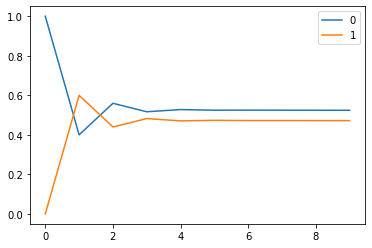

In [58]:
pd.DataFrame(result).plot()